In [1]:
import os
import pandas as pd
import scipy as sp
import numpy as np
import math
import matplotlib.pyplot as plt

In [2]:
iisc_dataset = "Experiment_21_07_2023_IISc_Table/"
iisc_dataset_files = ["2023-07-21_11-34-57/Accelerometer.csv", "2023-07-21_11-35-04/Accelerometer.csv", "2023-07-21_11-35-10/Accelerometer.csv", "2023-07-21_11-35-15/Accelerometer.csv", "2023-07-21_11-35-41/Accelerometer.csv", "2023-07-21_11-35-52/Accelerometer.csv", "2023-07-21_11-36-06/Accelerometer.csv", "2023-07-21_11-36-17/Accelerometer.csv", "2023-07-21_11-37-29/Accelerometer.csv", "2023-07-21_11-37-36/Accelerometer.csv"]

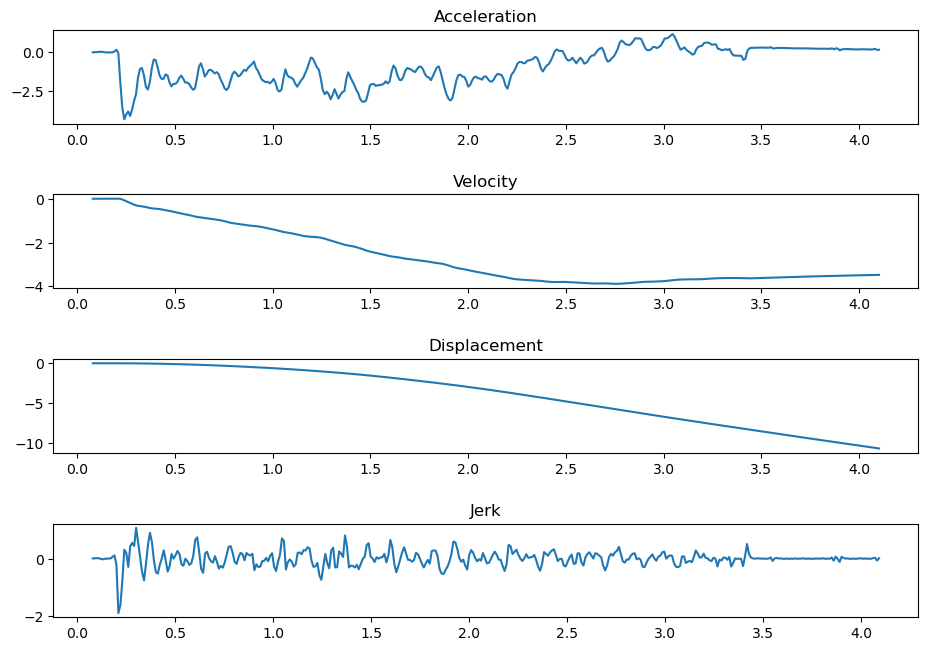

In [39]:
df = pd.read_csv(os.path.join(iisc_dataset, iisc_dataset_files[4]))
acceleration = df['y'].to_numpy()
time = df['seconds_elapsed'].to_numpy()

fig, ax = plt.subplots(4, 1, figsize=(10, 7))
fig.tight_layout(pad=3.0)

plt.subplot(4, 1, 1)
plt.title('Acceleration')
plt.plot(time, acceleration)

plt.subplot(4, 1, 2)
velocity = sp.integrate.cumtrapz(acceleration, time, initial=0)
plt.plot(time, velocity)
plt.title('Velocity')

plt.subplot(4, 1, 3)
displacement = sp.integrate.cumtrapz(velocity, time, initial=0)
plt.plot(time, displacement)
plt.title('Displacement')

plt.subplot(4, 1, 4)
jerk = [x - acceleration[i - 1] for i, x in enumerate(acceleration)][1:]
plt.plot(time[:len(jerk)], jerk)
plt.title('Jerk')

# print(displacement)
# print(f"Mean Velocity = {velocity.sum()}")
# print(f"Max Displacement = {displacement.max()}")

plt.show()

In [55]:
displacement_list = []
acceleration_list = []
velocity_list = []
for i in range(10):
    df = pd.read_csv(os.path.join(iisc_dataset, iisc_dataset_files[i]))
    acceleration = df['y'].to_numpy()
    time = df['seconds_elapsed'].to_numpy()
    
    dt = time[1] - time[0]
    vx = [0]
    dx = [0]

    for i in range(len(time) - 1):
        vx = vx + [vx[-1] + acceleration[i]*dt]

    for i in range(len(time) - 1):
        dx = dx + [dx[-1] + vx[i]*dt]
        
    displacement_list.append(np.abs(dx).max())
    acceleration_list.append(acceleration.mean())
    velocity_list.append(np.array(vx).mean())
    
data_dict = {'Mean Acceleration': acceleration_list, 'Mean Velocity' : velocity_list, 'Maximum Displacement': displacement_list}
pd.DataFrame(data_dict)

,Mean Acceleration,Mean Velocity,Maximum Displacement
0,-0.219464,0.107505,0.612436
1,0.001483,-0.078843,0.732826
2,0.302648,0.606636,1.827205
3,0.052858,-0.144115,0.571014
4,-0.860634,-2.635412,10.592426
5,0.052512,0.303010,1.219794
6,-0.097502,-0.497400,2.001808
7,0.202247,0.555355,1.674746
8,0.103777,0.260091,1.044679
9,-0.046412,-0.101491,0.412375


[0.1064048578096278, -0.07881995482937557, 0.6081250211976851, -0.14381190007875375, -2.639728431652234, 0.3032664730809398, -0.49794007604179813, 0.5576668541665787, 0.26060354231519367, -0.10171431061071268]


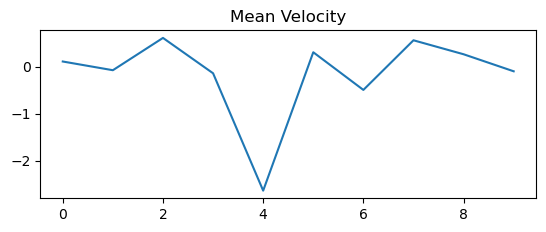

[0.3106626032250499, -0.4106198554693415, 0.7895184111442832, -0.30252506547252667, -4.013157023239144, 0.6122851212761188, -0.8433135293013504, 0.665096442088713, 0.4865250883409432, -0.2009753272960963]


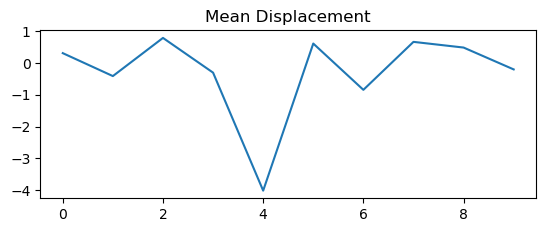

In [4]:
mean_velocity = []
mean_displacement = []

for i in range(10):
    df = pd.read_csv(os.path.join(iisc_dataset, iisc_dataset_files[i]))
    acceleration = df['y'].to_numpy()
    time = df['seconds_elapsed'].to_numpy()

    velocity = sp.integrate.cumtrapz(acceleration, time, initial=0)
    mean_velocity.append(velocity.mean())
    
    displacement = sp.integrate.cumtrapz(velocity, time, initial=0)
    mean_displacement.append(displacement.mean())
    
    jerk = [x - acceleration[i - 1] for i, x in enumerate(acceleration)][1:]

plt.subplot(2, 1, 1)
plt.plot(mean_velocity)
print(mean_velocity)
plt.title('Mean Velocity')
plt.show()

plt.subplot(2, 1, 2)
plt.title('Mean Displacement')
print(mean_displacement)
plt.plot(mean_displacement)
plt.show()

/tmp/ipykernel_103267/2631283212.py:13: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 2, 1)
/tmp/ipykernel_103267/2631283212.py:21: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 2, 3)


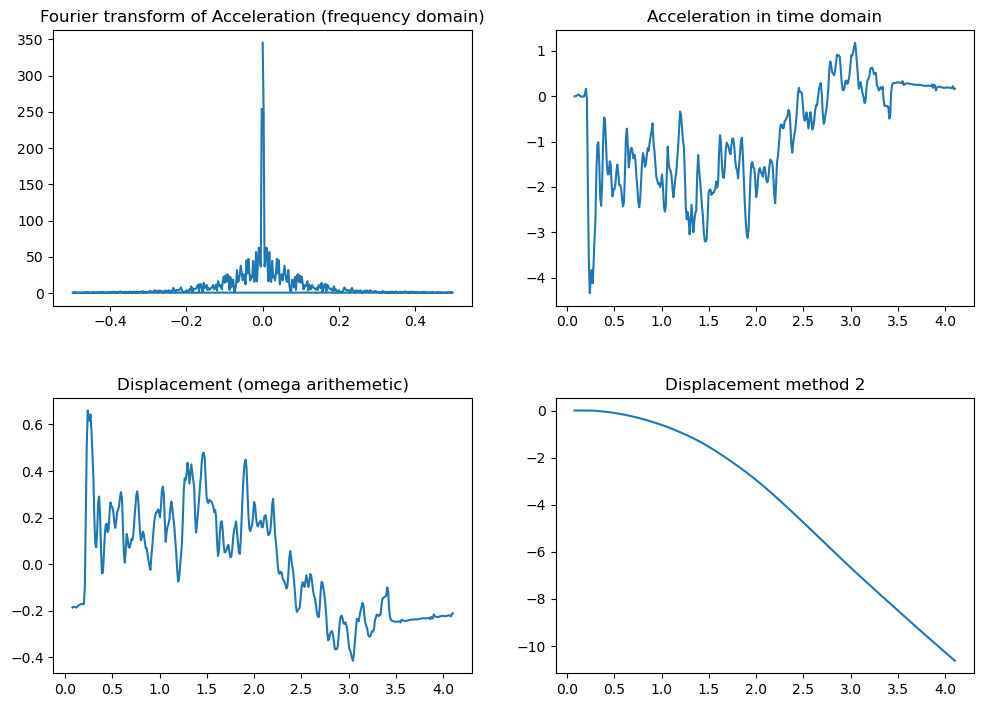

In [82]:
df = pd.read_csv(os.path.join(iisc_dataset, iisc_dataset_files[4]))
acceleration = list(df['y'])
time = df['seconds_elapsed'].to_numpy()

fig, ax = plt.subplots(4, 1, figsize=(10, 7))
fig.tight_layout(pad=1.0)

velocity = sp.integrate.cumtrapz(acceleration, time, initial=0)
displacement_m1 = sp.integrate.cumtrapz(velocity, time, initial=0)

fourier = np.fft.fft(acceleration)
freqs = np.fft.fftfreq(len(acceleration))
plt.subplot(2, 2, 1)
plt.title('Fourier transform of Acceleration (frequency domain)')
plt.plot(freqs, abs(fourier))

sampling_frequency = 50
T = 1/sampling_frequency
omega = (2 * math.pi) / T

plt.subplot(2, 2, 3)
displacement_freqdomain = -fourier/(omega ** 2)
displacement = np.fft.ifft(displacement_freqdomain)
plt.title('Displacement (omega arithemetic)')
plt.plot(time, displacement.real) # np.sqrt(displacement.imag**2 + displacement.real**2))

plt.subplot(2, 2, 4)
plt.title('Displacement method 2')
plt.plot(time, displacement_m1)

plt.subplot(2, 2, 2)
plt.title('Acceleration in time domain')
plt.plot(time, acceleration)
plt.show()